In [1353]:
#Importing libraries and dataset
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
pd.options.display.max_columns = None

In [1354]:
loan = pd.read_csv('loan.csv')

C:\Users\Public\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1355]:
loan_data = loan.copy()

In [1356]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [1357]:
loan_data.shape

(39717, 111)

## Data Cleaning

In [1358]:
#Dropping missing data
#dropping columns with more the 20 percentage of null values
loan_df = loan.loc[:, loan.isnull().mean() <= .2]

In [1359]:
## Deleting column having all values as same.
loan_df = loan_df.drop(['delinq_amnt', 'acc_now_delinq', 'application_type',
                         'policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths',
                         'tax_liens', 'collections_12_mths_ex_med'], axis=1)

In [1360]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [1361]:
## Deleting string columns having most of as unique values
loan_df = loan_df.drop(['emp_title','id','member_id','url', 'zip_code', 'title'], axis=1)

In [1362]:
## Check percentage of missing values
(loan_df.isnull().sum() * 100 / len(loan_df)).sort_values(ascending=False)

emp_length                 2.706650
pub_rec_bankruptcies       1.754916
last_pymnt_d               0.178765
revol_util                 0.125891
last_credit_pull_d         0.005036
addr_state                 0.000000
purpose                    0.000000
loan_status                0.000000
issue_d                    0.000000
verification_status        0.000000
annual_inc                 0.000000
funded_amnt                0.000000
dti                        0.000000
sub_grade                  0.000000
grade                      0.000000
installment                0.000000
int_rate                   0.000000
term                       0.000000
funded_amnt_inv            0.000000
home_ownership             0.000000
earliest_cr_line           0.000000
delinq_2yrs                0.000000
total_pymnt_inv            0.000000
last_pymnt_amnt            0.000000
collection_recovery_fee    0.000000
recoveries                 0.000000
total_rec_late_fee         0.000000
total_rec_int              0

### Creating categorical variables

In [1363]:
#Changing Employee Length column to discrete values
loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [1364]:
loan_df['emp_length']= loan_df['emp_length'].str.replace('\+ years','')
loan_df['emp_length']= loan_df['emp_length'].str.replace('< 1 year',str(0))
loan_df['emp_length']= loan_df['emp_length'].str.replace('years','')
loan_df['emp_length']= loan_df['emp_length'].str.replace('year', '')

In [1365]:
loan_df['emp_length']= pd.to_numeric(loan_df['emp_length'])

In [1366]:
#Changing terms column to numeric 
loan_df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [1367]:
loan_df['term'] = loan_df['term'].str.replace('months','')
loan_df['term']= pd.to_numeric(loan_df['term'])

In [1368]:
#Transforming int_rate to numeric value 
loan_df['int_rate'] = loan_df['int_rate'].str.replace('%','')
loan_df['int_rate']= pd.to_numeric(loan_df['int_rate'])

In [1369]:
#Transforming revol_util to numeric value
loan_df['revol_util'] = loan_df['revol_util'].str.replace('%','')
loan_df['revol_util']= pd.to_numeric(loan_df['revol_util'])

### Transforming Date fields 

In [1370]:
# Since most of the data is till 2017 , so we will base our calculations with base of Dec-1 -2017
# Extracts the date and the time from a string variable that is in a given format
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'],format='%b-%y')


In [1371]:
#Changing from datetype to numeric day difference between 1 Dec 2017 and the earliest cr_line day in months
loan_df['earliest_cr_line'] = pd.to_numeric((pd.to_datetime('2017-12-01')-loan_df['earliest_cr_line'])/np.timedelta64(1, 'M'))

In [1372]:
loan_df['earliest_cr_line'].describe()

count    39717.000000
mean       247.670854
std         88.945127
min       -612.020781
25%        194.993737
50%        235.043841
75%        288.005914
max        585.966858
Name: earliest_cr_line, dtype: float64

In [1373]:
#Imputing negative value with 1-Dec-2017 date
loan_df['earliest_cr_line'][loan_df['earliest_cr_line']< 0]= 0


C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1374]:
loan_df.earliest_cr_line.describe()

count    39717.000000
mean       248.960493
std         80.820700
min          0.000000
25%        194.993737
50%        235.043841
75%        288.005914
max        585.966858
Name: earliest_cr_line, dtype: float64

In [1375]:
# Extracts the date and the time from a string variable that is in a given format.
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format = '%b-%y')


In [1376]:
#Changing from datetype to numeric day difference between 1 Dec 2017 and the earliest cr_line day in months
loan_df['issue_d'] = pd.to_numeric((pd.to_datetime('2017-12-01')-loan_df['issue_d'])/np.timedelta64(1, 'M'))

In [1377]:
#Applying similar methods to last_pymnt_d column
loan_df['last_pymnt_d'] = pd.to_datetime(loan_df['last_pymnt_d'],format='%b-%y')
loan_df['last_pymnt_d'] = pd.to_numeric((pd.to_datetime('2017-12-01')-loan_df['last_pymnt_d'])/np.timedelta64(1, 'M'))

In [1378]:
#last_credit_pull_d
loan_df['last_credit_pull_d'] = pd.to_datetime(loan_df['last_credit_pull_d'],format='%b-%y')
loan_df['last_credit_pull_d'] = pd.to_numeric((pd.to_datetime('2017-12-01')-loan_df['last_credit_pull_d'])/np.timedelta64(1, 'M'))

In [1379]:
#Count Unique Values in each column
data = []
for row in loan_df.columns.tolist():
    data.append({'column': row, 'count': len(loan_df[row].unique())})
unique = pd.DataFrame(data).sort_values('count')

unique.head(30)

,column,count
3,term,2
13,loan_status,3
11,verification_status,3
37,pub_rec_bankruptcies,4
21,pub_rec,5
9,home_ownership,5
6,grade,7
19,inq_last_6mths,9
17,delinq_2yrs,11
8,emp_length,12


In [1380]:
## Imputing missing values
loan_df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_re

In [1381]:
loan_df['emp_length'].fillna(loan_df['emp_length'].median(), inplace=True)
loan_df['revol_util'].fillna(loan_df['revol_util'].median(), inplace=True)
loan_df['last_pymnt_d'].fillna(loan_df['last_pymnt_d'].median(), inplace=True)
loan_df['pub_rec_bankruptcies'].fillna(loan_df['pub_rec_bankruptcies'].median(), inplace=True)
loan_df['last_credit_pull_d'].fillna(loan_df['last_credit_pull_d'].median(), inplace=True)

In [1382]:
loan_df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d  

In [1383]:
loan_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,4.947101,6.896893e+04,84.897779,13.315130,0.146512,248.960493,0.869200,9.294408,0.055065,13382.528086,48.832741,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,55.714842,2678.826162,38.774952,0.042501
std,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,3.517584,6.379377e+04,10.988298,6.678594,0.491812,80.820700,1.070219,4.400282,0.237200,15885.016641,28.314798,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,18.287192,4447.136012,20.795437,0.202603
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,72.017906,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.022978,0.000000,19.022978,0.000000
25%,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,2.000000,4.040400e+04,76.026202,8.170000,0.000000,194.993737,0.000000,6.000000,0.000000,3703.000000,25.500000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,42.021397,218.680000,19.022978,0.000000
50%,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,4.000000,5.900000e+04,81.972936,13.400000,0.000000,235.043841,1.000000,9.000000,0.000000,8850.000000,49.300000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,56.017577,546.140000,33.052013,0.000000
75%,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,9.000000,8.230000e+04,91.040884,18.600000,0.000000,288.005914,1.000000,12.000000,0.000000,17058.000000,72.300000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,68.009610,3293.160000,54.013429,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,126.031335,29.990000,11.000000,585.966858,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,119.000390,36115.200000,127.049837,2.000000


Since we observe quite a few outliers post describing the data, lets handle the data for outliers using Z-Scores

In [1384]:
temp = loan_df[['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'issue_d',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'revol_bal', 'total_acc', 'total_rec_late_fee',
       'last_pymnt_d', 'last_credit_pull_d']]

In [1385]:
z_scores = stats.zscore(temp) #calculate z-scores of `temp`
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)#only considering values which are -3<-score
loan_df = loan_df[filtered_entries]

In [1386]:
loan_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
count,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.0,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.000000,32964.0
mean,10683.908203,10449.471393,10065.560228,42.208227,11.719945,309.875720,4.835245,63494.891103,84.274357,13.352797,0.083788,243.866354,0.817498,8.995541,0.0,11668.191087,48.608857,21.219846,45.602042,45.429984,11630.904530,11212.356123,9475.040511,2078.086814,0.482895,77.294384,9.756411,54.982752,2550.894797,38.317564,0.0
std,6694.872255,6478.844860,6398.915722,10.509934,3.653893,189.948782,3.474866,34106.277906,10.013841,6.678144,0.277074,79.738084,0.988114,4.012874,0.0,10919.150112,28.194444,10.588648,331.059902,329.959619,8152.528638,8043.154298,6472.750419,2265.354214,2.733459,568.912287,130.115441,17.517795,4111.108701,19.933648,0.0
min,700.000000,700.000000,0.000000,36.000000,5.420000,19.870000,0.000000,4000.000000,72.017906,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.022978,0.000000,19.022978,0.0
25%,5325.000000,5200.000000,5000.000000,36.000000,8.590000,164.860000,2.000000,40000.000000,76.026202,8.200000,0.000000,189.966940,0.000000,6.000000,0.0,3662.750000,25.200000,13.000000,0.000000,0.000000,5557.025543,5271.185000,4647.877500,639.617500,0.000000,0.000000,0.000000,42.021397,219.670000,19.022978,0.0
50%,9600.000000,9400.000000,8900.000000,36.000000,11.490000,273.760000,4.000000,56000.000000,81.972936,13.420000,0.000000,228.998542,1.000000,8.000000,0.0,8640.500000,49.100000,20.000000,0.000000,0.000000,9725.747125,9292.405000,8000.000000,1286.285000,0.000000,0.000000,0.000000,55.031931,533.050000,33.052013,0.0
75%,15000.000000,14500.000000,13975.000000,60.000000,14.220000,408.827500,8.000000,78996.000000,90.022382,18.620000,0.000000,283.044826,1.000000,11.000000,0.0,16234.000000,71.900000,28.000000,0.000000,0.000000,15946.326635,15394.117500,13000.000000,2652.100000,0.000000,0.000000,0.000000,67.023964,3226.622500,53.027783,0.0
max,33500.000000,33500.000000,33450.000000,60.000000,23.130000,1203.660000,10.000000,260000.000000,117.029097,29.990000,1.000000,585.966858,4.000000,22.000000,0.0,61007.000000,99.900000,56.000000,5656.770000,5652.310000,50489.710000,50489.710000,33500.000000,20215.120000,23.230000,20006.530000,7002.190000,109.998152,31147.450000,101.028769,0.0


In [1387]:
loan_df.shape

(32964, 38)

In [1388]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,72.017906,Fully Paid,credit_card,AZ,27.65,0,394.981416,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.0,34.990452,171.62,19.022978,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,72.017906,Fully Paid,small_business,IL,8.72,0,192.989589,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.0,42.021397,649.91,19.022978,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,72.017906,Fully Paid,other,CA,20.00,0,261.984846,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.0,34.990452,357.48,20.008624,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,72.017906,Current,other,OR,17.94,0,263.003347,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.0,0.0,19.022978,67.79,19.022978,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,72.017906,Fully Paid,wedding,AZ,11.20,0,156.980636,3,9,0,7963,28.3,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.0,0.0,34.990452,161.03,22.998419,0.0


#### To explore the data and understand trends, let's try using Univariate analysis on different variables and how they impact loan status, i.e. Charged off, Fully Paid, Current

## Univariate and Bivariate Analysis 

#### Categorical Variable Analaysis

In [1389]:
##Creating a DF of only customers who have fully paid back loans

fully_paid = loan_df[loan_df['loan_status'] == 'Fully Paid']

In [1390]:
fully_paid.shape

(27801, 38)

In [1391]:
##Creatign a DF of customers whose loans have been written off/defaulted

charged_off = loan_df[loan_df['loan_status'] == 'Charged Off']

In [1392]:
charged_off.shape

(4236, 38)

In [1393]:
temp1 = fully_paid.groupby('grade', as_index=False)['loan_status'].count()

In [1394]:
temp1['fullypaid_prop'] = temp1.loan_status/temp1.loan_status.sum()

In [1395]:
temp1

,grade,loan_status,fullypaid_prop
0,A,8697,0.312830
1,B,8780,0.315816
2,C,5216,0.187619
3,D,3123,0.112334
4,E,1439,0.051761
5,F,443,0.015935
6,G,103,0.003705


In [1396]:
temp2 = charged_off.groupby('grade', as_index=False)['loan_status'].count()

In [1397]:
temp2['chargedoff_prop'] = temp2.loan_status/temp2.loan_status.sum()

In [1398]:
temp2

,grade,loan_status,chargedoff_prop
0,A,541,0.127715
1,B,1154,0.272427
2,C,996,0.235127
3,D,811,0.191454
4,E,496,0.117092
5,F,190,0.044854
6,G,48,0.011331


In [1399]:
cat_grade = pd.concat([temp1, temp2], axis=1)

In [1400]:
cat_grade = cat_grade.iloc[:,1:]

In [1401]:
cat_grade

,loan_status,fullypaid_prop,grade,loan_status,chargedoff_prop
0,8697,0.312830,A,541,0.127715
1,8780,0.315816,B,1154,0.272427
2,5216,0.187619,C,996,0.235127
3,3123,0.112334,D,811,0.191454
4,1439,0.051761,E,496,0.117092
5,443,0.015935,F,190,0.044854
6,103,0.003705,G,48,0.011331


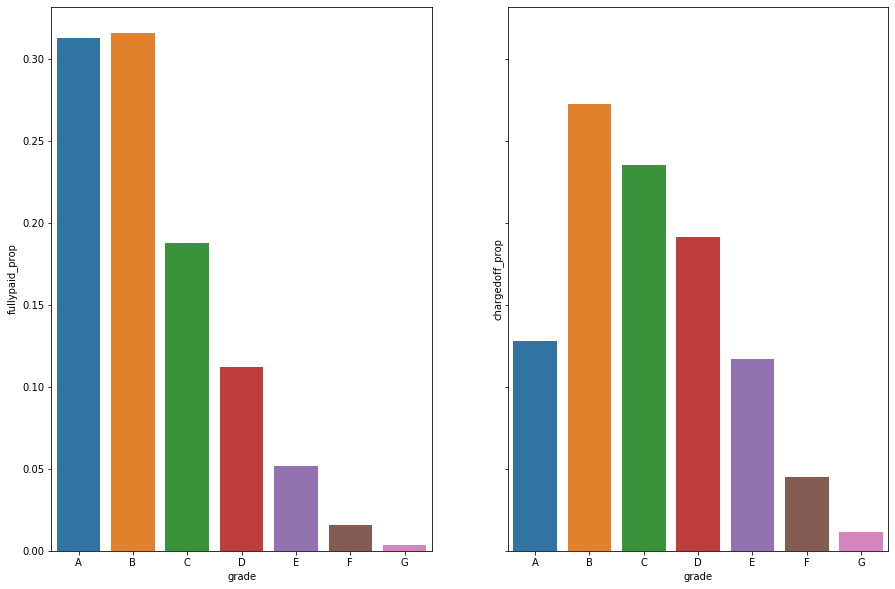

In [1402]:
##Plotting graphs of fully paid clients v/s charged off across loan grades w.r.t their proportion to total

fig, axes = plt.subplots(1,2, figsize=[15,10], squeeze=False, sharey=True)
sns.barplot(data = cat_grade, x='grade', y='fullypaid_prop', ax=axes[0,0])
sns.barplot(data=cat_grade, x='grade', y='chargedoff_prop', ax=axes[0,1])
plt.show()

#### Inference: We can clearly see a difference in the ratios for loan grades for fully paid v/s charged off customers, hence we can use this variable in further analysis

In [1403]:
##Creating a function to create a dataframe that returns proportions of values of each categorical variable for both:
## Fully Paid clients and Charged off clients

def cat_data(A):
    temp1 = fully_paid.groupby(A, as_index=False)['loan_status'].count()
    temp1['fullypaid_prop'] = temp1.loan_status/temp1.loan_status.sum()
    temp2 = charged_off.groupby(A, as_index=False)['loan_status'].count()
    temp2['chargedoff_prop'] = temp2.loan_status/temp2.loan_status.sum()
    df = pd.concat([temp1, temp2], axis=1)
    df = df.iloc[:,1:]
    return df
    

In [1404]:
##Creating function to plot all categorical variables in subplots with a view of fullypaid vs chargedoff customers

def plot_cat_variable(df, A):
    fig, axes = plt.subplots(1,2, figsize=[15,10], squeeze=False, sharey=True)
    P = sns.barplot(data = df, x=A, y='fullypaid_prop', ax=axes[0,0])
    P.set_xticklabels(P.get_xticklabels(), rotation=60, ha='center')
    Q = sns.barplot(data=df, x=A, y='chargedoff_prop', ax=axes[0,1])
    Q.set_xticklabels(Q.get_xticklabels(), rotation=60, ha='center')
    plt.show()

In [1405]:
##Sub_Grade variable

cat_sub_grade = cat_data('sub_grade')
cat_sub_grade

,loan_status,fullypaid_prop,sub_grade,loan_status,chargedoff_prop
0,1062,0.038200,A1,25,0.005902
1,1350,0.048559,A2,73,0.017233
2,1586,0.057048,A3,93,0.021955
3,2447,0.088018,A4,157,0.037063
4,2252,0.081004,A5,193,0.045562
5,1432,0.051509,B1,143,0.033758
6,1533,0.055142,B2,180,0.042493
7,2121,0.076292,B3,284,0.067044
8,1789,0.064350,B4,264,0.062323
9,1905,0.068523,B5,283,0.066808


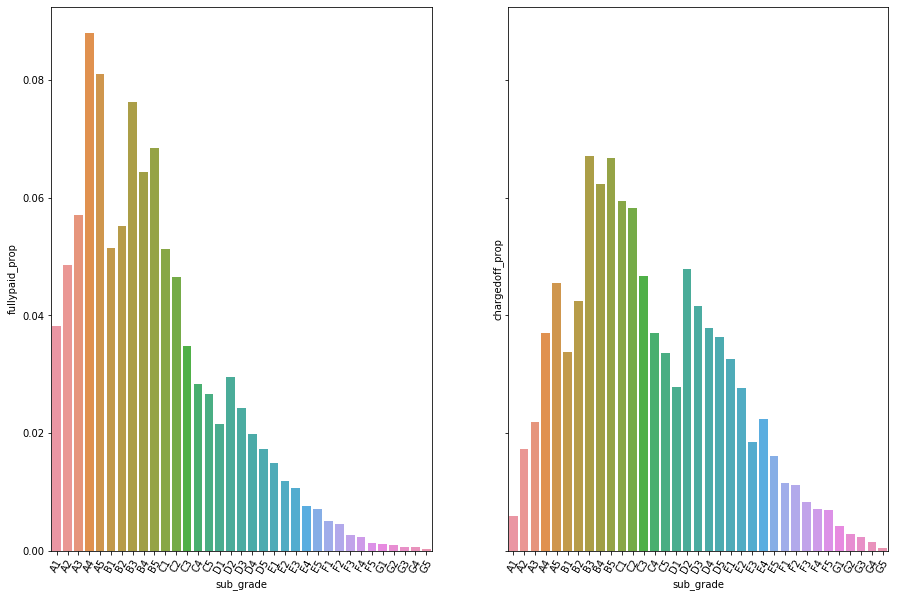

In [1406]:
plot_cat_variable(cat_sub_grade,'sub_grade')

#### Inference: There is a clear difference in patterns in the proportions for loan sub grades for fully paid v/s charged off customers, hence we can use thsis variable for further analysis

In [1407]:
##Home Ownership Variable

cat_home_ownership = cat_data('home_ownership')
cat_home_ownership

,loan_status,fullypaid_prop,home_ownership,loan_status,chargedoff_prop
0,11825,0.425344,MORTGAGE,1636,0.386213
1,66,0.002374,OTHER,14,0.003305
2,2122,0.076328,OWN,338,0.079792
3,13788,0.495953,RENT,2248,0.530689


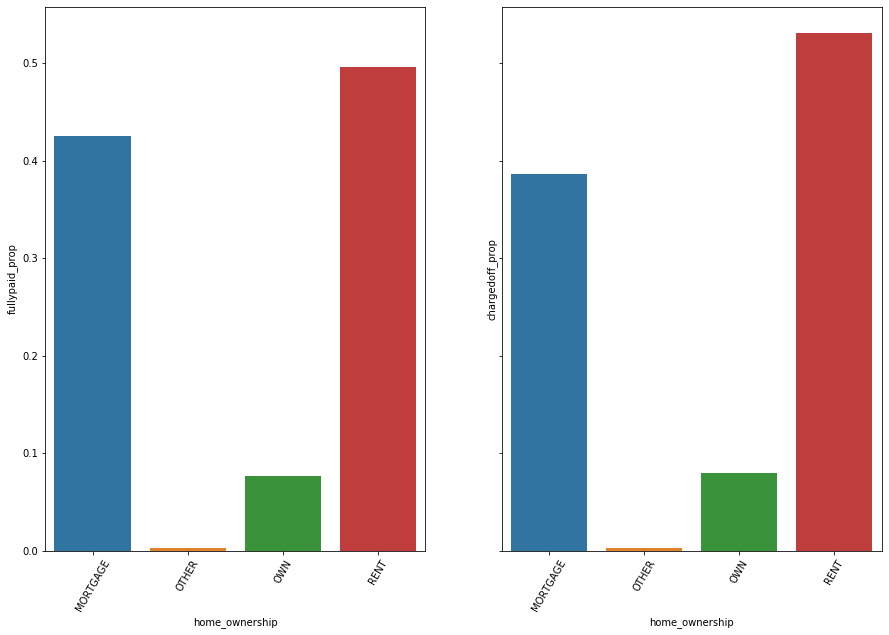

In [1408]:
plot_cat_variable(cat_home_ownership,'home_ownership')

#### Inference: There is no clear difference in pattern for home ownership proportions across categories when we observe full paid v/s charged off customers, hence we can consider ignoring this variable and it might not be required for further analysis

In [1409]:
##Purpose Variable

cat_purpose = cat_data('purpose')
cat_purpose

,loan_status,fullypaid_prop,purpose,loan_status,chargedoff_prop
0,1149,0.041329,car,128,0.030217
1,3806,0.136902,credit_card,409,0.096553
2,12970,0.466530,debt_consolidation,2096,0.494806
3,215,0.007734,educational,40,0.009443
4,2004,0.072084,home_improvement,247,0.058310
5,258,0.009280,house,42,0.009915
6,1694,0.060933,major_purchase,183,0.043201
7,467,0.016798,medical,79,0.018650
8,422,0.015179,moving,75,0.017705
9,2754,0.099061,other,493,0.116383


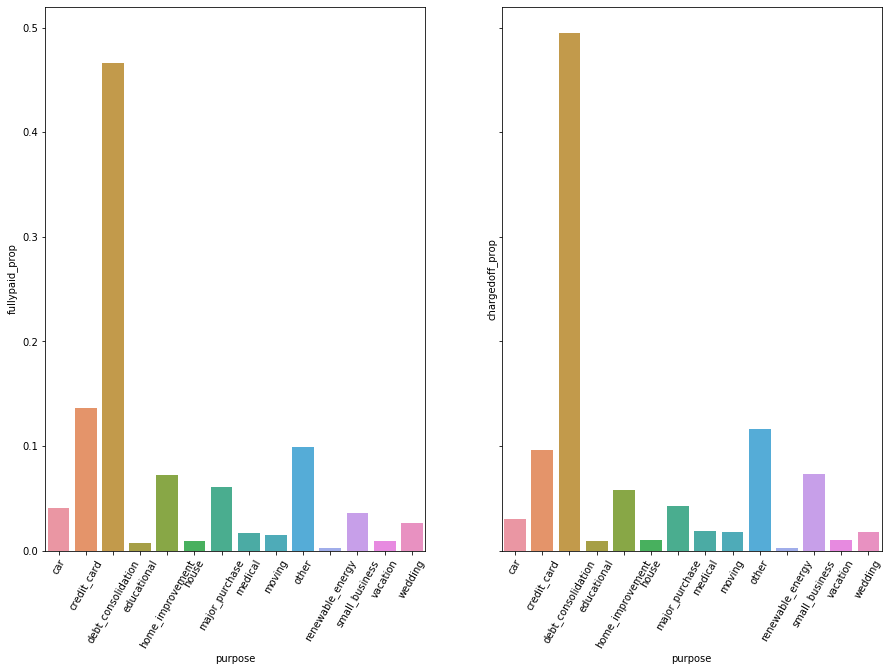

In [1410]:
plot_cat_variable(cat_purpose, 'purpose')

#### Inference: There seems to be an obervable difference in the ratios when comparing purpose of loan for full paid vs charged off customers, hence we can consider this variable for further analysis

In [1411]:
##Address State Variable

cat_state = cat_data('addr_state')
cat_state

,loan_status,fullypaid_prop,addr_state,loan_status,chargedoff_prop
0,50,0.001798,AK,10.0,0.002361
1,321,0.011546,AL,42.0,0.009915
2,180,0.006475,AR,16.0,0.003777
3,612,0.022014,AZ,93.0,0.021955
4,5021,0.180605,CA,865.0,0.204202
5,546,0.019640,CO,63.0,0.014873
6,511,0.018381,CT,64.0,0.015109
7,176,0.006331,DC,7.0,0.001653
8,86,0.003093,DE,9.0,0.002125
9,1925,0.069242,FL,400.0,0.094429


In [1412]:
cat_state.dropna(inplace=True)
cat_state

,loan_status,fullypaid_prop,addr_state,loan_status,chargedoff_prop
0,50,0.001798,AK,10.0,0.002361
1,321,0.011546,AL,42.0,0.009915
2,180,0.006475,AR,16.0,0.003777
3,612,0.022014,AZ,93.0,0.021955
4,5021,0.180605,CA,865.0,0.204202
5,546,0.019640,CO,63.0,0.014873
6,511,0.018381,CT,64.0,0.015109
7,176,0.006331,DC,7.0,0.001653
8,86,0.003093,DE,9.0,0.002125
9,1925,0.069242,FL,400.0,0.094429


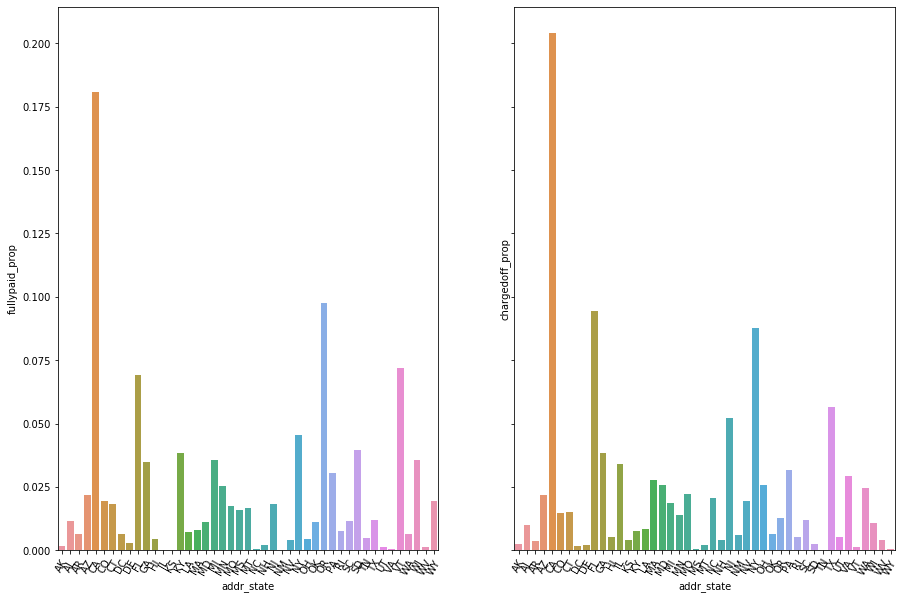

In [1413]:
plot_cat_variable(cat_state,'addr_state')

#### Inference: There seems to be a significant difference in proportions for fullpaid v/s charged off customers across different states, hence we can use this variable for further analysis

#### Continuous Variables Analysis

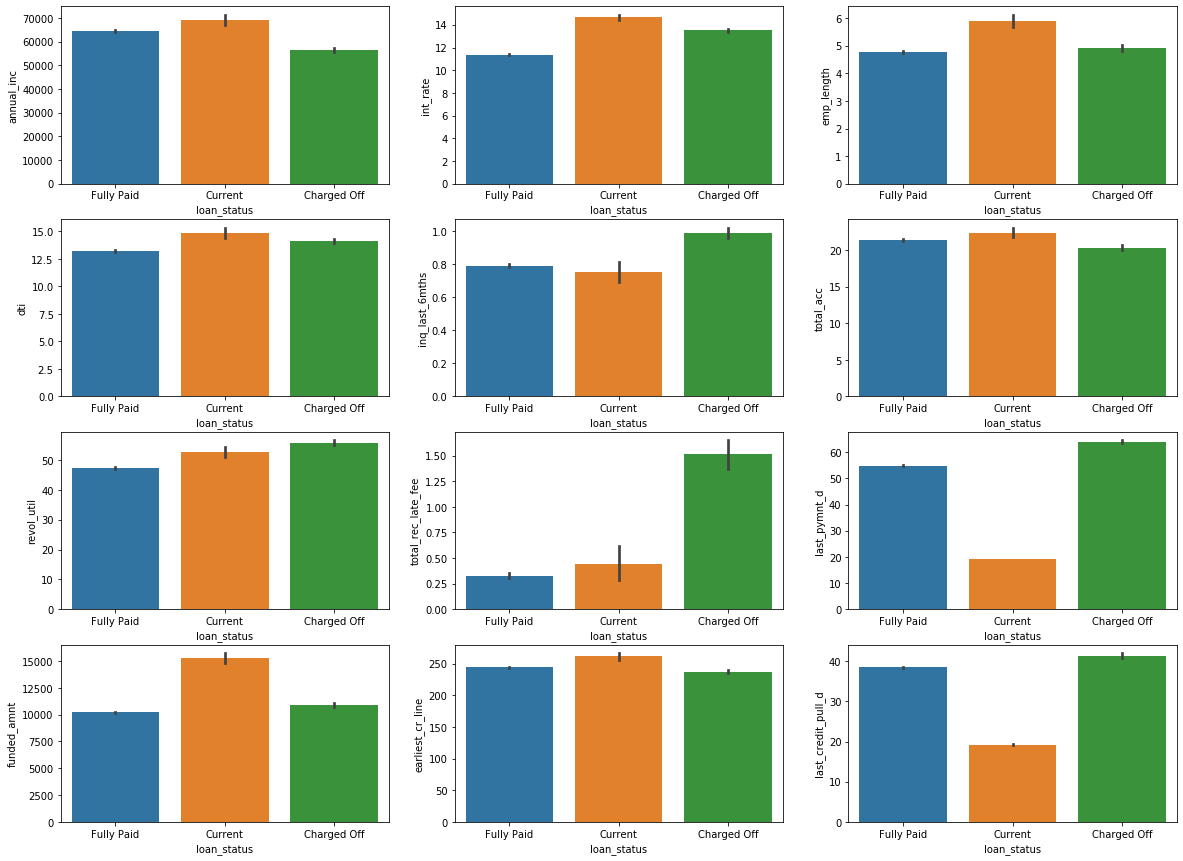

In [1414]:
# Plotting a subplot of continuous variables to get a birds eye view of how major variables have an impact
fig, axes = plt.subplots(4,3, figsize=[20,15], squeeze=False)
sns.barplot(data = loan_df, x='loan_status', y='annual_inc', ax=axes[0,0])
sns.barplot(data = loan_df, x='loan_status', y='int_rate', ax=axes[0,1])
sns.barplot(data = loan_df, x='loan_status', y='emp_length', ax=axes[0,2])
sns.barplot(data = loan_df, x='loan_status', y='dti', ax=axes[1,0])
sns.barplot(data = loan_df, x='loan_status', y='inq_last_6mths', ax=axes[1,1])
sns.barplot(data = loan_df, x='loan_status', y='total_acc', ax=axes[1,2])
sns.barplot(data = loan_df, x='loan_status', y='revol_util', ax=axes[2,0])
sns.barplot(data = loan_df, x='loan_status', y='total_rec_late_fee', ax=axes[2,1])
sns.barplot(data = loan_df, x='loan_status', y='last_pymnt_d', ax=axes[2,2])
sns.barplot(data = loan_df, x='loan_status', y='funded_amnt', ax=axes[3,0])
sns.barplot(data = loan_df, x='loan_status', y='earliest_cr_line', ax=axes[3,1])
sns.barplot(data = loan_df, x='loan_status', y='last_credit_pull_d', ax=axes[3,2])
plt.show()

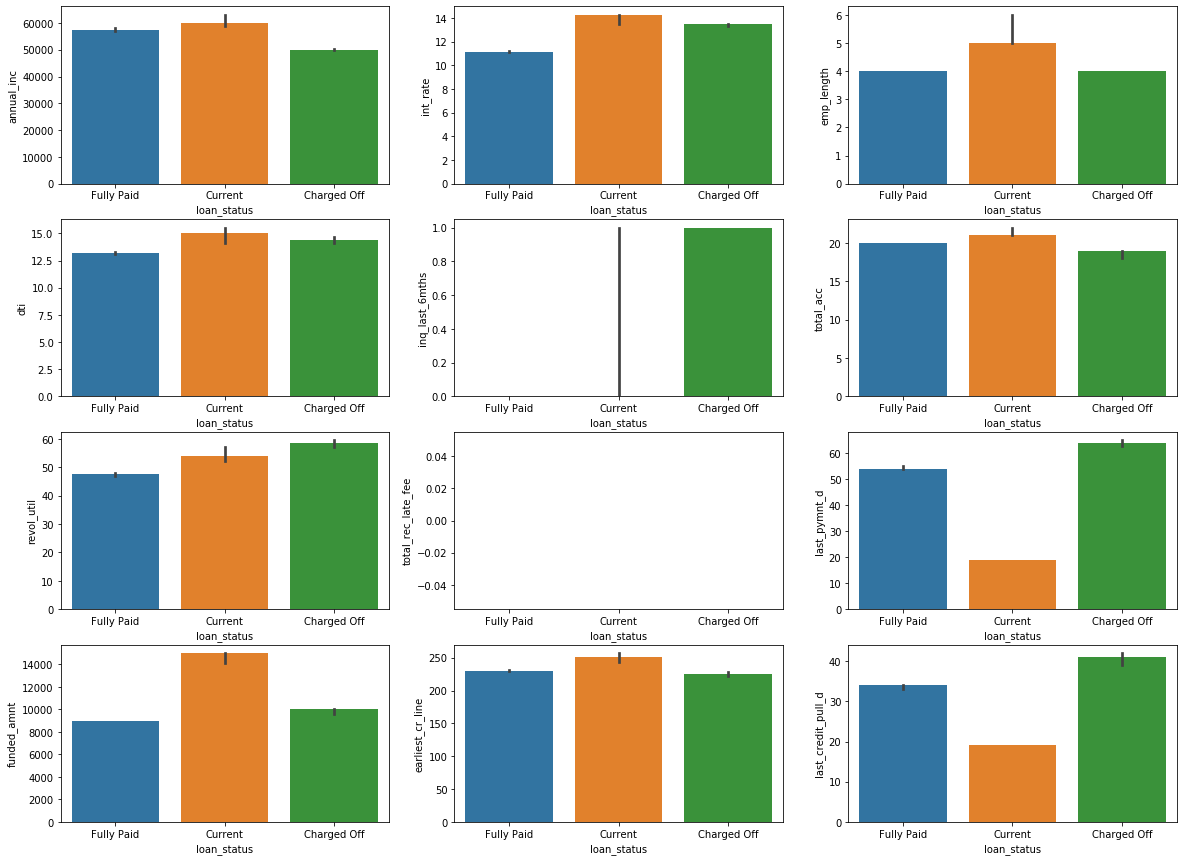

In [1415]:
# Plotting a subplot of continuous variables to get a birds eye view of how major variables have an impact
fig, axes = plt.subplots(4,3, figsize=[20,15], squeeze=False)
sns.barplot(data = loan_df, x='loan_status', y='annual_inc', ax=axes[0,0], estimator = np.median)
sns.barplot(data = loan_df, x='loan_status', y='int_rate', ax=axes[0,1], estimator = np.median)
sns.barplot(data = loan_df, x='loan_status', y='emp_length', ax=axes[0,2], estimator = np.median)
sns.barplot(data = loan_df, x='loan_status', y='dti', ax=axes[1,0], estimator = np.median)
sns.barplot(data = loan_df, x='loan_status', y='inq_last_6mths', ax=axes[1,1], estimator = np.median)
sns.barplot(data = loan_df, x='loan_status', y='total_acc', ax=axes[1,2], estimator = np.median)
sns.barplot(data = loan_df, x='loan_status', y='revol_util', ax=axes[2,0], estimator = np.median)
sns.barplot(data = loan_df, x='loan_status', y='total_rec_late_fee', ax=axes[2,1], estimator = np.median)
sns.barplot(data = loan_df, x='loan_status', y='last_pymnt_d', ax=axes[2,2], estimator = np.median)
sns.barplot(data = loan_df, x='loan_status', y='funded_amnt', ax=axes[3,0], estimator = np.median)
sns.barplot(data = loan_df, x='loan_status', y='earliest_cr_line', ax=axes[3,1], estimator=np.median)
sns.barplot(data = loan_df, x='loan_status', y='last_credit_pull_d', ax=axes[3,2], estimator=np.median)
plt.show()

#### Inference: Here we have plotted subplots with both Mean and Median as 2 different charts. We can notice few variables specifically 'total_rec_late_fee' and 'inq_last_6mths' do not have enough observations when we plot their median, and also 'earliest_cr_line' doesn't seem to have a significant difference in their median values so we can drop these 3 variables in further analysis

## Use of Derived Variables

### Weight of Evidence and Information Value

#### The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. “Bad Customers” refers to the customers who defaulted on a loan. and “Good Customers” refers to the customers who paid back loan

#### Information value is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance

#### Both are really simple to calculate. Down below are the formulae:


<img src="Capture.png">

#### Once we have the IV of the variable, we can check against this table to see the predictive power of the variable.¶
 

<img src="IV.png">

## Calculating WOE and IV for our dataset to predict features which impact loan defaults 

#### Loan status will be the dependant variable for our dataset and we shall calculate the WOE/IV for thr other variables wrt Loan Status

In [1416]:
# Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts
loan_df['loan_status'].value_counts()
# Displays unique values of a column

Fully Paid     27801
Charged Off     4236
Current          927
Name: loan_status, dtype: int64

In [1417]:
loan_df1 = loan_df[loan_df['loan_status'] != 'Current']

In [1418]:
# Good/ Bad Definition
# We create a new variable that has the value of '0' if the loan is charged off i.e a bad loan, and the value of '1' if it is not met.
loan_df1['good_bad'] = np.where(loan_df1['loan_status'].isin(['Charged Off']), 0, 1)

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1419]:
loan_df1.sample(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,good_bad
30108,2800,2800,2800.0,36,16.07,98.55,D,D5,1.0,MORTGAGE,24000.0,Not Verified,91.040884,Fully Paid,debt_consolidation,OH,5.00,1,223.051808,0,3,0,3985,99.6,8,0.0,0.0,3563.808281,3563.81,2800.0,748.81,15.0,0.0,0.0,55.031931,115.06,55.031931,0.0,1
459,4375,4375,4375.0,36,12.42,146.20,B,B4,2.0,OWN,15000.0,Verified,72.017906,Fully Paid,debt_consolidation,CA,13.92,0,132.996571,0,3,0,2847,74.9,5,0.0,0.0,5262.849999,5262.85,4375.0,887.85,0.0,0.0,0.0,36.008953,152.40,28.025216,0.0,1
16639,17000,17000,16725.0,36,7.66,530.06,A,A5,3.0,MORTGAGE,57600.0,Verified,80.034498,Fully Paid,credit_card,CA,15.40,0,192.003943,0,6,0,19815,52.8,18,0.0,0.0,18865.159810,18559.99,17000.0,1865.16,0.0,0.0,0.0,55.031931,6180.40,54.013429,0.0,1
30998,8000,8000,6875.0,36,7.51,248.88,A,A4,2.0,MORTGAGE,52780.0,Not Verified,92.026530,Fully Paid,debt_consolidation,OH,12.75,0,204.981622,0,7,0,7258,39.0,14,0.0,0.0,8959.742579,7699.78,8000.0,959.74,0.0,0.0,0.0,56.017577,272.70,31.047865,0.0,1
16922,3800,3800,3800.0,36,10.37,123.28,B,B3,3.0,RENT,60000.0,Verified,80.034498,Fully Paid,vacation,CA,10.52,0,151.033902,0,7,0,725,33.5,9,0.0,0.0,4266.017888,4266.02,3800.0,466.02,0.0,0.0,0.0,61.997166,2172.22,19.022978,0.0,1
7723,4800,4800,4800.0,36,7.49,149.29,A,A4,5.0,RENT,80000.0,Not Verified,75.007700,Fully Paid,debt_consolidation,CA,11.70,0,203.995975,0,13,0,20603,42.0,22,0.0,0.0,5374.359999,5374.36,4800.0,574.36,0.0,0.0,0.0,38.998747,162.63,19.022978,0.0,1
8406,6400,6400,6400.0,36,9.99,206.48,B,B1,10.0,RENT,33000.0,Source Verified,75.007700,Fully Paid,debt_consolidation,MA,16.11,0,160.003285,1,16,0,6696,18.0,23,0.0,0.0,7433.277983,7433.28,6400.0,1033.28,0.0,0.0,0.0,38.998747,228.04,20.008624,0.0,1
28533,6000,6000,6000.0,60,13.23,137.23,C,C1,8.0,RENT,73000.0,Source Verified,90.022382,Fully Paid,debt_consolidation,CA,23.26,0,428.033430,1,8,0,9148,88.0,30,0.0,0.0,6800.774077,6800.77,6000.0,800.77,0.0,0.0,0.0,69.028111,696.47,19.022978,0.0,1
1249,10000,10000,10000.0,36,6.62,307.04,A,A2,2.0,RENT,45000.0,Source Verified,72.017906,Fully Paid,debt_consolidation,IL,24.24,0,218.025011,0,9,0,1623,0.0,18,0.0,0.0,11053.310000,11053.31,10000.0,1053.31,0.0,0.0,0.0,36.008953,321.32,22.998419,0.0,1
17545,10000,10000,10000.0,60,16.40,245.32,E,E1,10.0,OWN,85000.0,Not Verified,81.052999,Fully Paid,major_purchase,KY,5.99,0,327.004661,2,13,0,11948,45.1,27,0.0,0.0,14718.372360,14718.37,10000.0,4718.37,0.0,0.0,0.0,20.008624,244.49,19.022978,0.0,1


#### Analysis of variable 'Grade' on Loan Status

In [1420]:
# Creating df out of grade and dependant variable
df1= loan_df1[["grade","good_bad"]]

In [1421]:
df1.head()

,grade,good_bad
0,B,1
2,C,1
3,C,1
5,A,1
6,C,1


In [1422]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()
# Groups the data according to a criterion contained in one column.
# Does not turn the names of the values of the criterion as indexes.
# Aggregates the data in another column, using a selected function.
# In this specific case, we group by the column with index 0 and we aggregate the values of the column with index 1.
# More specifically, we count them.
# In other words, we count the values in the column with index 1 for each value of the column with index 0.

,grade,good_bad
0,A,9238
1,B,9934
2,C,6212
3,D,3934
4,E,1935
5,F,633
6,G,151


In [1423]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()
# Groups the data according to a criterion contained in one column.
# Does not turn the names of the values of the criterion as indexes.
# Aggregates the data in another column, using a selected function.
# In this specific case, we group by the column with index 0 and we aggregate the values of the column with index 1.
# More specifically, we count them.
# In other words, we count the values in the column with index 1 for each value of the column with index 0.

,grade,good_bad
0,A,0.941438
1,B,0.883833
2,C,0.839665
3,D,0.793849
4,E,0.743669
5,F,0.699842
6,G,0.682119


In [1424]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)

In [1425]:
df1

,grade,good_bad,grade,good_bad
0,A,9238,A,0.941438
1,B,9934,B,0.883833
2,C,6212,C,0.839665
3,D,3934,D,0.793849
4,E,1935,E,0.743669
5,F,633,F,0.699842
6,G,151,G,0.682119


In [1426]:
df1 = df1.iloc[:, [0, 1, 3]]
# Selects only columns with specific indexes.
df1

,grade,good_bad,good_bad
0,A,9238,0.941438
1,B,9934,0.883833
2,C,6212,0.839665
3,D,3934,0.793849
4,E,1935,0.743669
5,F,633,0.699842
6,G,151,0.682119


In [1427]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
# Changes the names of the columns of a dataframe.
df1

,grade,n_obs,prop_good
0,A,9238,0.941438
1,B,9934,0.883833
2,C,6212,0.839665
3,D,3934,0.793849
4,E,1935,0.743669
5,F,633,0.699842
6,G,151,0.682119


In [1428]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
# We divide the values of one column by he values of another column and save the result in a new variable.
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,9238,0.941438,0.288354
1,B,9934,0.883833,0.310079
2,C,6212,0.839665,0.193901
3,D,3934,0.793849,0.122796
4,E,1935,0.743669,0.060399
5,F,633,0.699842,0.019758
6,G,151,0.682119,0.004713


In [1429]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
# We multiply the values of one column by he values of another column and save the result in a new variable.
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,9238,0.941438,0.288354,8697.0,541.0
1,B,9934,0.883833,0.310079,8780.0,1154.0
2,C,6212,0.839665,0.193901,5216.0,996.0
3,D,3934,0.793849,0.122796,3123.0,811.0
4,E,1935,0.743669,0.060399,1439.0,496.0
5,F,633,0.699842,0.019758,443.0,190.0
6,G,151,0.682119,0.004713,103.0,48.0


In [1430]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,9238,0.941438,0.288354,8697.0,541.0,0.312830,0.127715
1,B,9934,0.883833,0.310079,8780.0,1154.0,0.315816,0.272427
2,C,6212,0.839665,0.193901,5216.0,996.0,0.187619,0.235127
3,D,3934,0.793849,0.122796,3123.0,811.0,0.112334,0.191454
4,E,1935,0.743669,0.060399,1439.0,496.0,0.051761,0.117092
5,F,633,0.699842,0.019758,443.0,190.0,0.015935,0.044854
6,G,151,0.682119,0.004713,103.0,48.0,0.003705,0.011331


In [1431]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
# We take the natural logarithm of a variable and save the result in a nex variable.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,9238,0.941438,0.288354,8697.0,541.0,0.312830,0.127715,0.895862
1,B,9934,0.883833,0.310079,8780.0,1154.0,0.315816,0.272427,0.147790
2,C,6212,0.839665,0.193901,5216.0,996.0,0.187619,0.235127,-0.225714
3,D,3934,0.793849,0.122796,3123.0,811.0,0.112334,0.191454,-0.533171
4,E,1935,0.743669,0.060399,1439.0,496.0,0.051761,0.117092,-0.816325
5,F,633,0.699842,0.019758,443.0,190.0,0.015935,0.044854,-1.034907
6,G,151,0.682119,0.004713,103.0,48.0,0.003705,0.011331,-1.117925


In [1432]:
df1 = df1.sort_values(['WoE'])
# Sorts a dataframe by the values of a given column.
df1 = df1.reset_index(drop = True)
# We reset the index of a dataframe and overwrite it.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,151,0.682119,0.004713,103.0,48.0,0.003705,0.011331,-1.117925
1,F,633,0.699842,0.019758,443.0,190.0,0.015935,0.044854,-1.034907
2,E,1935,0.743669,0.060399,1439.0,496.0,0.051761,0.117092,-0.816325
3,D,3934,0.793849,0.122796,3123.0,811.0,0.112334,0.191454,-0.533171
4,C,6212,0.839665,0.193901,5216.0,996.0,0.187619,0.235127,-0.225714
5,B,9934,0.883833,0.310079,8780.0,1154.0,0.315816,0.272427,0.147790
6,A,9238,0.941438,0.288354,8697.0,541.0,0.312830,0.127715,0.895862


In [1434]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
# We sum all values of a given column.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,G,151,0.682119,0.004713,103.0,48.0,0.003705,0.011331,-1.117925,0.316944
1,F,633,0.699842,0.019758,443.0,190.0,0.015935,0.044854,-1.034907,0.316944
2,E,1935,0.743669,0.060399,1439.0,496.0,0.051761,0.117092,-0.816325,0.316944
3,D,3934,0.793849,0.122796,3123.0,811.0,0.112334,0.191454,-0.533171,0.316944
4,C,6212,0.839665,0.193901,5216.0,996.0,0.187619,0.235127,-0.225714,0.316944
5,B,9934,0.883833,0.310079,8780.0,1154.0,0.315816,0.272427,0.147790,0.316944
6,A,9238,0.941438,0.288354,8697.0,541.0,0.312830,0.127715,0.895862,0.316944


#### We shall encapsulate the above steps in a function , so it can be applied to each variables to calculate WOE/IV

In [1435]:
# WoE function for discrete unordered variables
def woe_discrete(df):
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 2 arguments: a dataframe, a string. The function returns a dataframe as a result.

In [1436]:
df_grade = loan_df1[['grade', 'good_bad']]
df_grade_final = woe_discrete(df_grade)
# We execute the function we defined with the necessary arguments: a dataframe, a string, and a dataframe.
# We store the result in a dataframe.
df_grade_final

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,G,151,0.682119,0.004713,103.0,48.0,0.003705,0.011331,-1.117925,0.316944
1,F,633,0.699842,0.019758,443.0,190.0,0.015935,0.044854,-1.034907,0.316944
2,E,1935,0.743669,0.060399,1439.0,496.0,0.051761,0.117092,-0.816325,0.316944
3,D,3934,0.793849,0.122796,3123.0,811.0,0.112334,0.191454,-0.533171,0.316944
4,C,6212,0.839665,0.193901,5216.0,996.0,0.187619,0.235127,-0.225714,0.316944
5,B,9934,0.883833,0.310079,8780.0,1154.0,0.315816,0.272427,0.147790,0.316944
6,A,9238,0.941438,0.288354,8697.0,541.0,0.312830,0.127715,0.895862,0.316944


In [1437]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 60):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

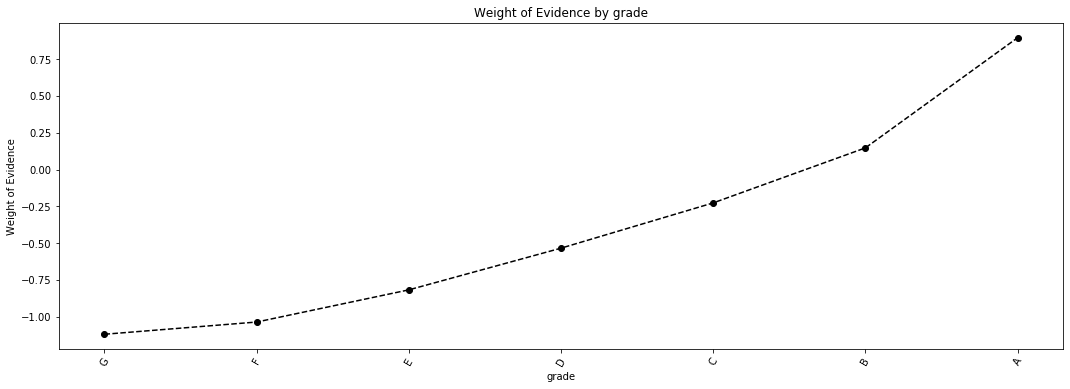

In [1438]:
plot_by_woe(df_grade_final)
# We execute the function we defined with the necessary arguments: a dataframe.
# We omit the number argument, which means the function will use its default value, 0.

#### Inference : 
#### Grade has a very strong IV , which indicates that it has a strong prediction value in forecasting whether the customer will default or not. As per the graph, we can conclude: Loans classified as A has the highest WoE and thereby least chance of default and subsequently with decrease in loan grade from A to G the WoE becomes negative which means increasing probability of default 

#### Analysis of variable 'Subgrade' on Loan Status

In [1439]:
df_sub_grade = loan_df1[['sub_grade', 'good_bad']]

In [1440]:
df_sub_grade_final = woe_discrete(df_sub_grade)
df_sub_grade_final

,sub_grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,F5,66,0.560606,0.002060,37.0,29.0,0.001331,0.006846,-1.637830,0.355946
1,G3,28,0.642857,0.000874,18.0,10.0,0.000647,0.002361,-1.293666,0.355946
2,G1,51,0.647059,0.001592,33.0,18.0,0.001187,0.004249,-1.275317,0.355946
3,F4,95,0.684211,0.002965,65.0,30.0,0.002338,0.007082,-1.108263,0.355946
4,F3,111,0.684685,0.003465,76.0,35.0,0.002734,0.008263,-1.106067,0.355946
5,E4,305,0.688525,0.009520,210.0,95.0,0.007554,0.022427,-1.088222,0.355946
6,G2,40,0.700000,0.001249,28.0,12.0,0.001007,0.002833,-1.034155,0.355946
7,F2,172,0.726744,0.005369,125.0,47.0,0.004496,0.011095,-0.903286,0.355946
8,E2,445,0.737079,0.013890,328.0,117.0,0.011798,0.027620,-0.850613,0.355946
9,G4,23,0.739130,0.000718,17.0,6.0,0.000611,0.001416,-0.839999,0.355946


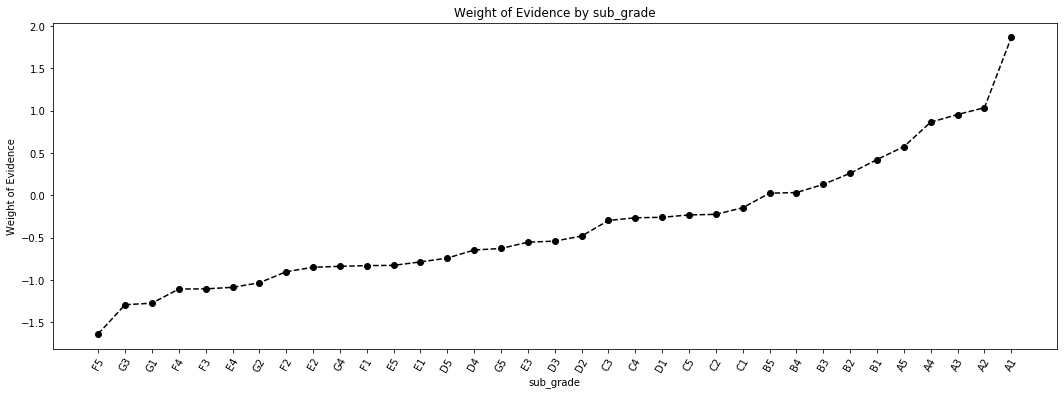

In [1441]:
plot_by_woe(df_sub_grade_final)

#### Inference: There is a clear WoE trend which shows that subgrades of A and B have the highest WoE reflecting least possibility of default for such loans, post C2 there is a declining trend for WoE

#### Analysis of variable 'Purpose' on Loan Status

In [1442]:
df_purpose=loan_df1[['purpose', 'good_bad']]

In [1443]:
df_purpose_final = woe_discrete(df_purpose)
df_purpose_final

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,small_business,1311,0.762014,0.040921,999.0,312.0,0.035934,0.073654,-0.717701,0.062288
1,educational,255,0.843137,0.007960,215.0,40.0,0.007734,0.009443,-0.199694,0.062288
2,renewable_energy,83,0.843373,0.002591,70.0,13.0,0.002518,0.003069,-0.197907,0.062288
3,other,3247,0.848168,0.101352,2754.0,493.0,0.099061,0.116383,-0.161152,0.062288
4,moving,497,0.849095,0.015513,422.0,75.0,0.015179,0.017705,-0.153935,0.062288
5,medical,546,0.855311,0.017043,467.0,79.0,0.016798,0.018650,-0.104571,0.062288
6,house,300,0.860000,0.009364,258.0,42.0,0.009280,0.009915,-0.066163,0.062288
7,debt_consolidation,15066,0.860879,0.470269,12970.0,2096.0,0.466530,0.494806,-0.058844,0.062288
8,vacation,310,0.861290,0.009676,267.0,43.0,0.009604,0.010151,-0.055404,0.062288
9,home_improvement,2251,0.890271,0.070263,2004.0,247.0,0.072084,0.058310,0.212060,0.062288


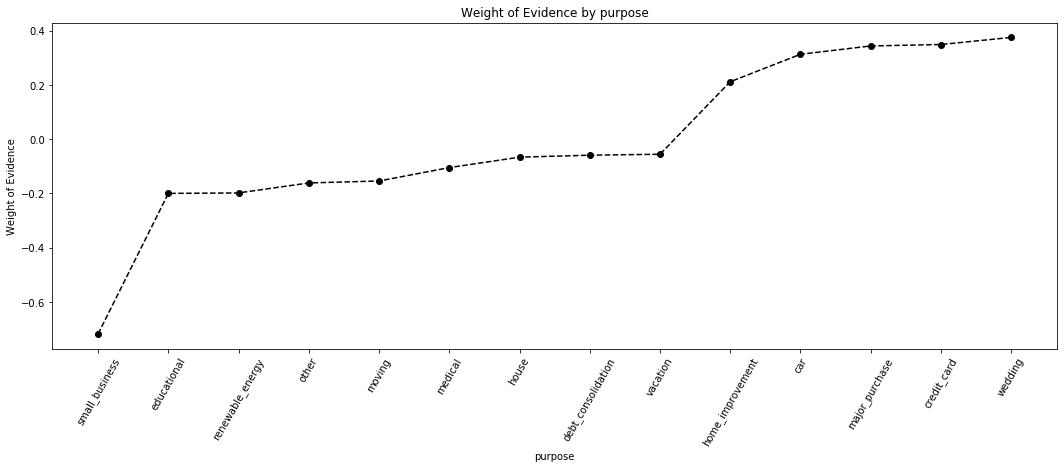

In [1444]:
plot_by_woe(df_purpose_final)

#### Inference: People value loans taken for big occasions such as Weddings, Major Purchase, Car and have a higher tendency to repay them whereas small business loans, educational loans etc. have a higher tendency of default

#### Analysis of variable 'addr_state' on Loan Status

In [1445]:
df_state=loan_df1[['addr_state', 'good_bad']]

In [1446]:
df_state_final = woe_discrete(df_state)
df_state_final

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,SD,53,0.792453,0.001654,42.0,11.0,0.001511,0.002597,-0.541678,inf
1,NV,398,0.793970,0.012423,316.0,82.0,0.011366,0.019358,-0.532430,inf
2,FL,2325,0.827957,0.072572,1925.0,400.0,0.069242,0.094429,-0.310236,inf
3,MO,558,0.829749,0.017417,463.0,95.0,0.016654,0.022427,-0.297602,inf
4,AK,60,0.833333,0.001873,50.0,10.0,0.001798,0.002361,-0.272015,inf
5,NM,151,0.834437,0.004713,126.0,25.0,0.004532,0.005902,-0.264046,inf
6,WA,651,0.840246,0.020320,547.0,104.0,0.019676,0.024551,-0.221395,inf
7,HI,144,0.847222,0.004495,122.0,22.0,0.004388,0.005194,-0.168474,inf
8,NJ,1488,0.850806,0.046446,1266.0,222.0,0.045538,0.052408,-0.140512,inf
9,CA,5886,0.853041,0.183725,5021.0,865.0,0.180605,0.204202,-0.122798,inf


#### Here we observe IV as infinity and when we go through the data points, we observe that 3 states (NE, IA and ID) have n_bads equal to zero, hence let's try to drop these 3 states and re-analyze

In [1447]:
df_state = df_state[~(df_state.isin(['NE', 'IA', 'ID']))]

In [1448]:
df_state_final = woe_discrete(df_state)
df_state_final

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,SD,53,0.792453,0.001655,42.0,11.0,0.001511,0.002597,-0.541498,0.047914
1,NV,398,0.793970,0.012425,316.0,82.0,0.011369,0.019358,-0.532250,0.047914
2,FL,2325,0.827957,0.072584,1925.0,400.0,0.069255,0.094429,-0.310056,0.047914
3,MO,558,0.829749,0.017420,463.0,95.0,0.016657,0.022427,-0.297423,0.047914
4,AK,60,0.833333,0.001873,50.0,10.0,0.001799,0.002361,-0.271835,0.047914
5,NM,151,0.834437,0.004714,126.0,25.0,0.004533,0.005902,-0.263867,0.047914
6,WA,651,0.840246,0.020323,547.0,104.0,0.019679,0.024551,-0.221215,0.047914
7,HI,144,0.847222,0.004496,122.0,22.0,0.004389,0.005194,-0.168294,0.047914
8,NJ,1488,0.850806,0.046454,1266.0,222.0,0.045546,0.052408,-0.140332,0.047914
9,CA,5886,0.853041,0.183754,5021.0,865.0,0.180638,0.204202,-0.122618,0.047914


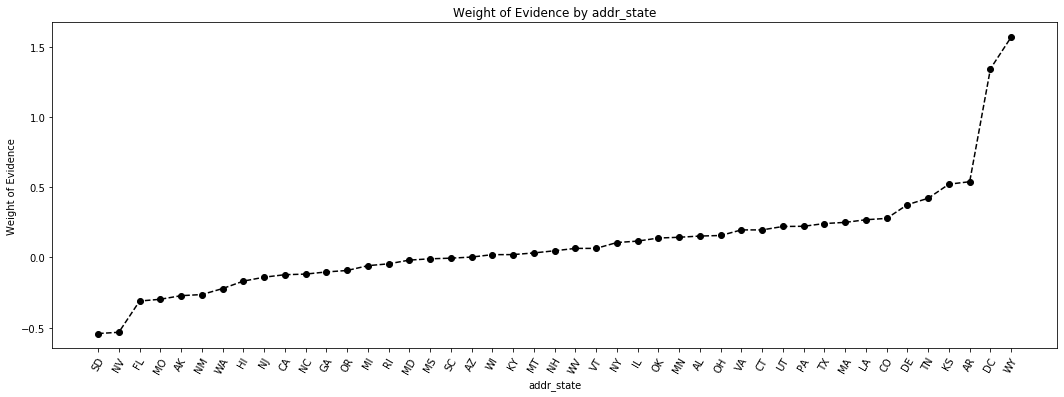

In [1449]:
plot_by_woe(df_state_final)

#### Inference: IV value is significant here and we can see a slight trend as we move across states, but there is no geographical pattern that can be deduced

### Analyzing Continuous Variables

In [1450]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df):
    #df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of the variable under analysis

#### How 'loan term' affects default rate?

In [1451]:
## Term_Int
df_term =  loan_df1[["term","good_bad"]]

In [1452]:
df_term_final = woe_ordered_continuous(df_term)
df_term_final

,term,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,36,24437,0.900438,0.762774,22004.0,2433.0,0.791482,0.574363,0.320647,0.224548
1,60,7600,0.762763,0.237226,5797.0,1803.0,0.208518,0.425637,-0.713564,0.224548


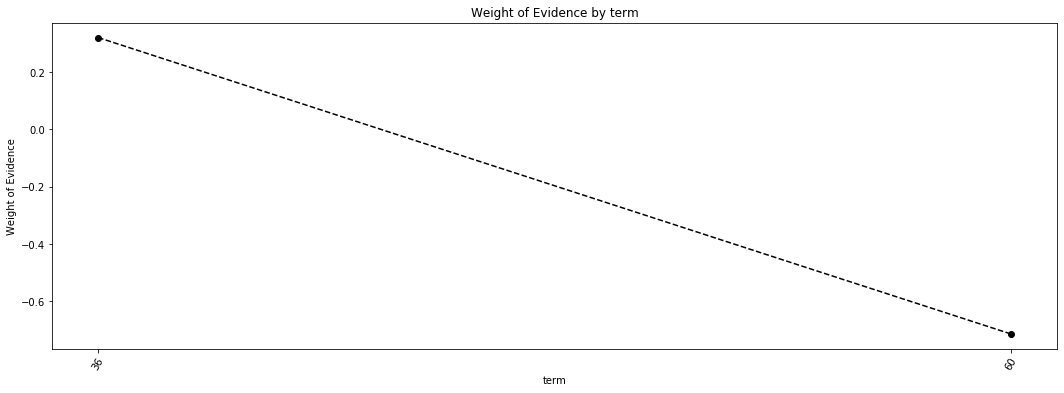

In [1453]:
plot_by_woe(df_term_final)

#### Inference:  As the term length of the loan increases the probability of loan default increases as well

#### How 'int rate' affects loan default rate?

In [1454]:
## Int_Rate
loan_df1['int_rate'] = pd.qcut(loan_df1['int_rate'], 25)

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1455]:
df_int_rate = loan_df1[['int_rate', 'good_bad']]

In [1456]:
df_int_rate_final = woe_ordered_continuous(df_int_rate)
df_int_rate_final

,int_rate,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(5.419, 5.99]",1285,0.960311,0.040110,1234.0,51.0,0.044387,0.012040,1.304738,0.366017
1,"(5.99, 6.62]",1402,0.951498,0.043762,1334.0,68.0,0.047984,0.016053,1.094977,0.366017
2,"(6.62, 7.14]",1298,0.949923,0.040516,1233.0,65.0,0.044351,0.015345,1.061366,0.366017
3,"(7.14, 7.51]",1811,0.944230,0.056528,1710.0,101.0,0.061509,0.023843,0.947676,0.366017
4,"(7.51, 7.88]",1170,0.947863,0.036520,1109.0,61.0,0.039891,0.014400,1.018888,0.366017
5,"(7.88, 8.49]",1112,0.908273,0.034710,1010.0,102.0,0.036330,0.024079,0.411280,0.366017
6,"(8.49, 8.94]",921,0.921824,0.028748,849.0,72.0,0.030538,0.016997,0.585941,0.366017
7,"(8.94, 9.91]",1389,0.912887,0.043356,1268.0,121.0,0.045610,0.028565,0.467953,0.366017
8,"(9.91, 10.36]",1199,0.894912,0.037425,1073.0,126.0,0.038596,0.029745,0.260479,0.366017
9,"(10.36, 10.65]",1508,0.890584,0.047071,1343.0,165.0,0.048308,0.038952,0.215263,0.366017


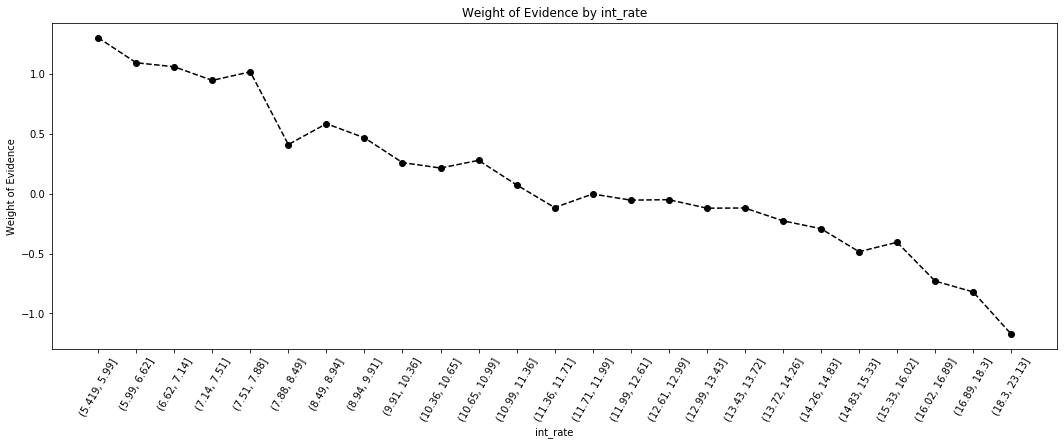

In [1457]:
plot_by_woe(df_int_rate_final)

#### Inference: As the interest rate moves to the higher buckets the WoE reduces which basically provides evidence that the probability of default increases

#### How 'dti' (Debt to Income Ratio) has an impact on loan default rate?

In [1458]:
loan_df1['dti'] = pd.qcut(loan_df1['dti'], 25)

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1459]:
df_dti = loan_df1[['dti', 'good_bad']]

In [1460]:
df_dti_final = woe_ordered_continuous(df_dti)
df_dti_final

,dti,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(-0.001, 1.73]",1283,0.892440,0.040047,1145.0,138.0,0.041186,0.032578,0.234454,0.027059
1,"(1.73, 3.39]",1283,0.885425,0.040047,1136.0,147.0,0.040862,0.034703,0.163383,0.027059
2,"(3.39, 4.72]",1280,0.884375,0.039954,1132.0,148.0,0.040718,0.034939,0.153076,0.027059
3,"(4.72, 5.9]",1283,0.906469,0.040047,1163.0,120.0,0.041833,0.028329,0.389814,0.027059
4,"(5.9, 6.98]",1282,0.882995,0.040016,1132.0,150.0,0.040718,0.035411,0.139653,0.027059
5,"(6.98, 7.92]",1281,0.882904,0.039985,1131.0,150.0,0.040682,0.035411,0.138770,0.027059
6,"(7.92, 8.86]",1296,0.890432,0.040453,1154.0,142.0,0.041509,0.033522,0.213710,0.027059
7,"(8.86, 9.7]",1265,0.867984,0.039486,1098.0,167.0,0.039495,0.039424,0.001799,0.027059
8,"(9.7, 10.57]",1284,0.890187,0.040079,1143.0,141.0,0.041114,0.033286,0.211199,0.027059
9,"(10.57, 11.38]",1291,0.878389,0.040297,1134.0,157.0,0.040790,0.037063,0.095808,0.027059


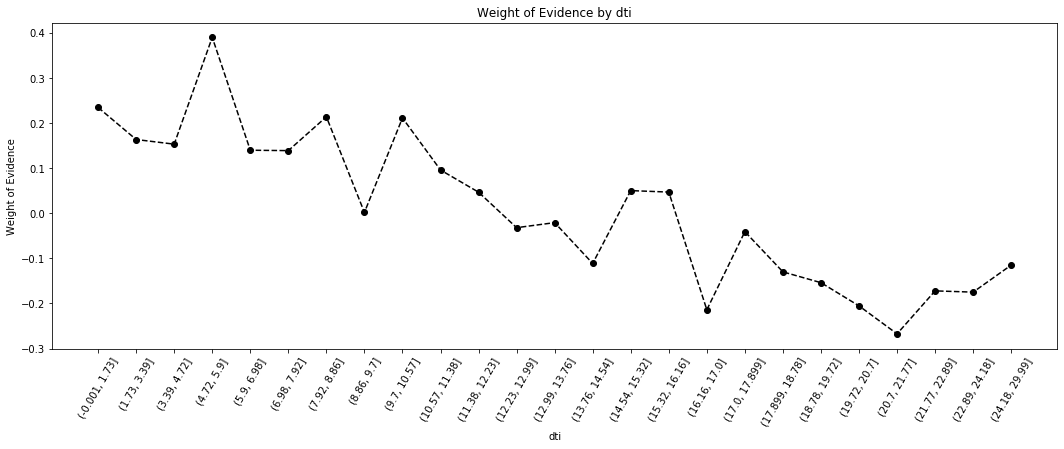

In [1461]:
plot_by_woe(df_dti_final)

#### Inference: The general trend shows that as the debt-to-income ratio moves higher the loan default rate increases, which is pretty much understandable due to increased debt burden

#### How 'total_acc' (total no. of credit accounts) has an impact on loan default rate?

In [1462]:
#Total_acc
loan_df1['total_acc'] = pd.qcut(loan_df1['total_acc'], 15)

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1463]:
df_total_acc = loan_df1[['total_acc', 'good_bad']]

In [1464]:
df_total_acc_final = woe_ordered_continuous(df_total_acc)
df_total_acc_final

,total_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(1.999, 7.0]",2335,0.836403,0.072884,1953.0,382.0,0.070249,0.090179,-0.249751,0.017913
1,"(7.0, 10.0]",2840,0.846831,0.088648,2405.0,435.0,0.086508,0.102691,-0.171493,0.017913
2,"(10.0, 12.0]",2218,0.854373,0.069232,1895.0,323.0,0.068163,0.076251,-0.112131,0.017913
3,"(12.0, 13.0]",1190,0.869748,0.037145,1035.0,155.0,0.037229,0.036591,0.017279,0.017913
4,"(13.0, 15.0]",2467,0.862586,0.077005,2128.0,339.0,0.076544,0.080028,-0.044515,0.017913
5,"(15.0, 17.0]",2388,0.861390,0.074539,2057.0,331.0,0.073990,0.078140,-0.054567,0.017913
6,"(17.0, 19.0]",2246,0.877560,0.070106,1971.0,275.0,0.070897,0.064920,0.088073,0.017913
7,"(19.0, 21.0]",2326,0.877902,0.072604,2042.0,284.0,0.073451,0.067044,0.091258,0.017913
8,"(21.0, 23.0]",2055,0.890024,0.064145,1829.0,226.0,0.065789,0.053352,0.209537,0.017913
9,"(23.0, 25.0]",1957,0.870210,0.061086,1703.0,254.0,0.061257,0.059962,0.021360,0.017913


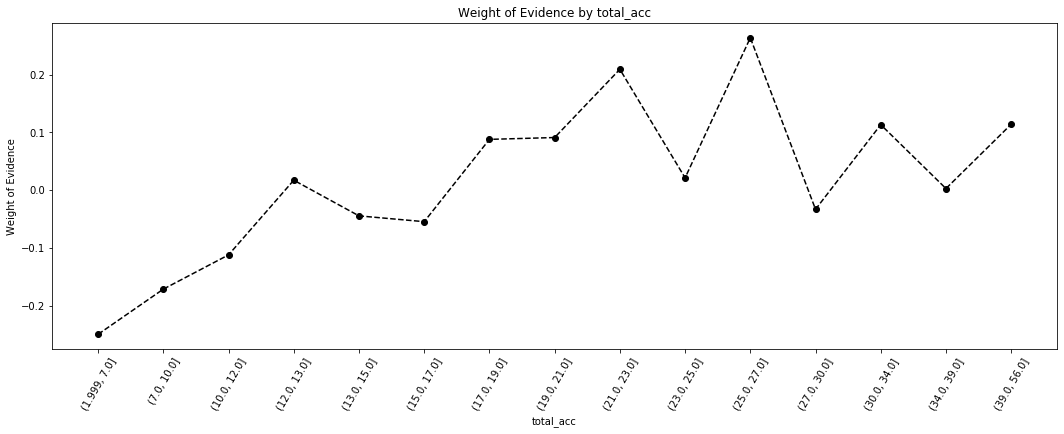

In [1465]:
plot_by_woe(df_total_acc_final)

#### Inference: There is slight evidence of a lower default rate probability with increase in total credit accounts, but as IV value is very less, there is no conclusive evidence

#### How 'revol_util' has an impact on loan default rate?

In [1466]:
loan_df1['revol_util'] = pd.qcut(loan_df1['revol_util'], 25)

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1467]:
df_revol_util = loan_df1[['revol_util', 'good_bad']]

In [1468]:
df_revol_util_final = woe_ordered_continuous(df_revol_util)
df_revol_util_final

,revol_util,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(-0.001, 1.6]",1292,0.890093,0.040328,1150.0,142.0,0.041365,0.033522,0.210238,0.10529
1,"(1.6, 6.4]",1295,0.926641,0.040422,1200.0,95.0,0.043164,0.022427,0.654747,0.10529
2,"(6.4, 10.8]",1273,0.943441,0.039735,1201.0,72.0,0.043200,0.016997,0.932791,0.10529
3,"(10.8, 15.4]",1280,0.909375,0.039954,1164.0,116.0,0.041869,0.027384,0.424575,0.10529
4,"(15.4, 19.9]",1277,0.900548,0.039860,1150.0,127.0,0.041365,0.029981,0.321878,0.10529
5,"(19.9, 24.1]",1305,0.905747,0.040734,1182.0,123.0,0.042516,0.029037,0.381326,0.10529
6,"(24.1, 28.0]",1258,0.897456,0.039267,1129.0,129.0,0.040610,0.030453,0.287823,0.10529
7,"(28.0, 32.0]",1294,0.878671,0.040391,1137.0,157.0,0.040898,0.037063,0.098450,0.10529
8,"(32.0, 35.9]",1273,0.872742,0.039735,1111.0,162.0,0.039963,0.038244,0.043967,0.10529
9,"(35.9, 39.7]",1276,0.893417,0.039829,1140.0,136.0,0.041006,0.032106,0.244676,0.10529


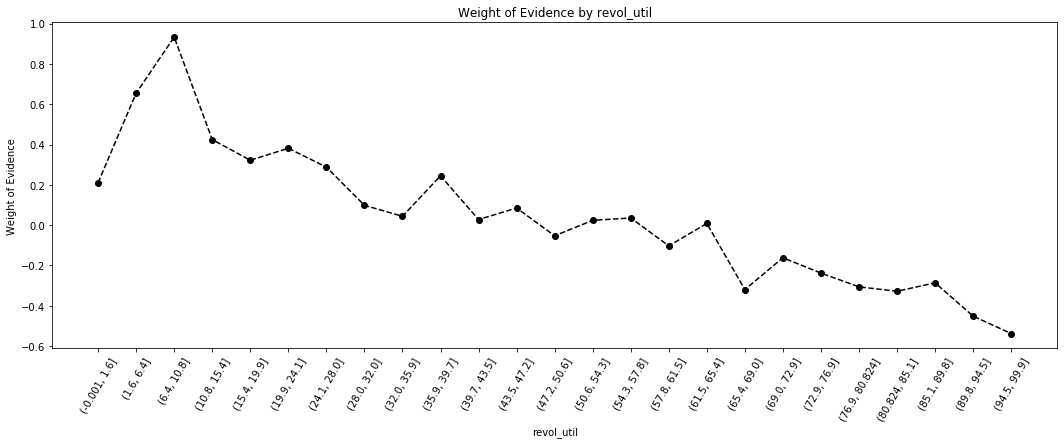

In [1469]:
plot_by_woe(df_revol_util_final)

#### Inference: There is significant evidence which says that with increase in revolving utilization rate, the loan default possibility increases

#### How 'annual_inc' has an impact on loan default rate?

In [1470]:
## annual_inc
loan_df1['annual_inc'] = pd.qcut(loan_df1['annual_inc'], 25)

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1471]:
df_annual_inc = loan_df1[['annual_inc', 'good_bad']]

In [1472]:
df_annual_inc_final = woe_ordered_continuous(df_annual_inc)
df_annual_inc_final

,annual_inc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(3999.999, 21600.0]",1287,0.813520,0.040172,1047.0,240.0,0.037661,0.056657,-0.408407,0.077006
1,"(21600.0, 26400.0]",1285,0.825681,0.040110,1061.0,224.0,0.038164,0.052880,-0.326131,0.077006
2,"(26400.0, 30000.0]",1454,0.836314,0.045385,1216.0,238.0,0.043739,0.056185,-0.250401,0.077006
3,"(30000.0, 34000.0]",1195,0.826778,0.037301,988.0,207.0,0.035538,0.048867,-0.318489,0.077006
4,"(34000.0, 36000.0]",1252,0.828275,0.039080,1037.0,215.0,0.037301,0.050755,-0.308003,0.077006
5,"(36000.0, 39996.0]",1300,0.838462,0.040578,1090.0,210.0,0.039207,0.049575,-0.234627,0.077006
6,"(39996.0, 42000.0]",1681,0.841166,0.052471,1414.0,267.0,0.050861,0.063031,-0.214523,0.077006
7,"(42000.0, 45000.0]",1470,0.860544,0.045884,1265.0,205.0,0.045502,0.048395,-0.061635,0.077006
8,"(45000.0, 47000.0]",620,0.874194,0.019353,542.0,78.0,0.019496,0.018414,0.057105,0.077006
9,"(47000.0, 50000.0]",1953,0.862263,0.060961,1684.0,269.0,0.060573,0.063503,-0.047237,0.077006


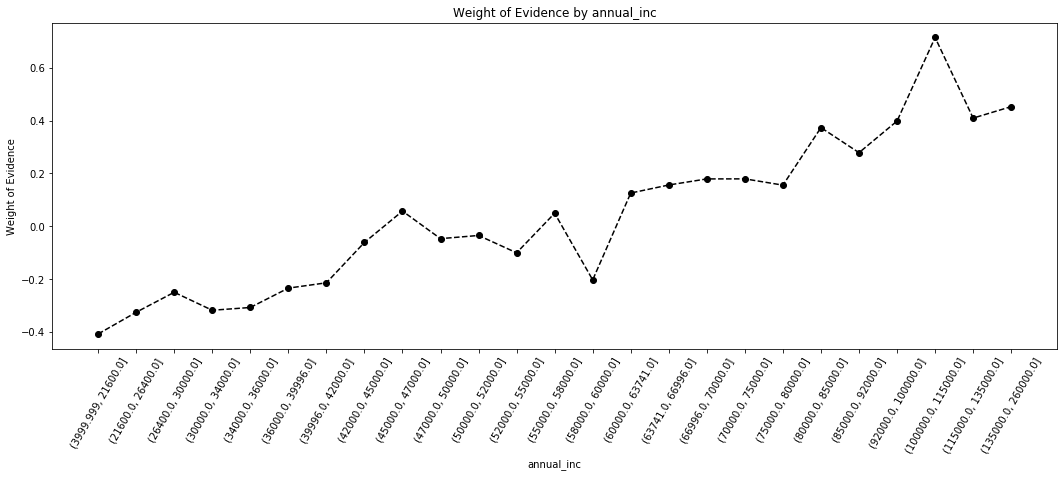

In [1473]:
plot_by_woe(df_annual_inc_final)

#### Inference: There is a general trend which shows that with increase in Annual Income, the probability of default rate decreases

#### How 'last_payment_d' (converted into - no. of days from last payment date) impacts loan default rate?

In [1474]:
loan_df1['last_pymnt_d'] = pd.qcut(loan_df1['last_pymnt_d'], 25)

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1475]:
df_lastpay = loan_df1[['last_pymnt_d', 'good_bad']]

In [1476]:
df_lastpay_final = woe_ordered_continuous(df_lastpay)
df_lastpay_final

,last_pymnt_d,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(19.022, 27.007]",1403,0.976479,0.043793,1370.0,33.0,0.049279,0.007790,1.844606,0.40385
1,"(27.007, 34.99]",1345,0.910037,0.041983,1224.0,121.0,0.044027,0.028565,0.432636,0.40385
2,"(34.99, 36.995]",1342,0.958271,0.041889,1286.0,56.0,0.046257,0.013220,1.252488,0.40385
3,"(36.995, 38.999]",1274,0.952119,0.039767,1213.0,61.0,0.043632,0.014400,1.108525,0.40385
4,"(38.999, 41.036]",1418,0.959097,0.044261,1360.0,58.0,0.048919,0.013692,1.273344,0.40385
5,"(41.036, 43.04]",1259,0.925338,0.039298,1165.0,94.0,0.041905,0.022191,0.635729,0.40385
6,"(43.04, 45.044]",1288,0.937112,0.040204,1207.0,81.0,0.043416,0.019122,0.819992,0.40385
7,"(45.044, 46.982]",1402,0.920827,0.043762,1291.0,111.0,0.046437,0.026204,0.572190,0.40385
8,"(46.982, 48.987]",1246,0.888443,0.038893,1107.0,139.0,0.039819,0.032814,0.193482,0.40385
9,"(48.987, 50.991]",1185,0.867511,0.036988,1028.0,157.0,0.036977,0.037063,-0.002328,0.40385


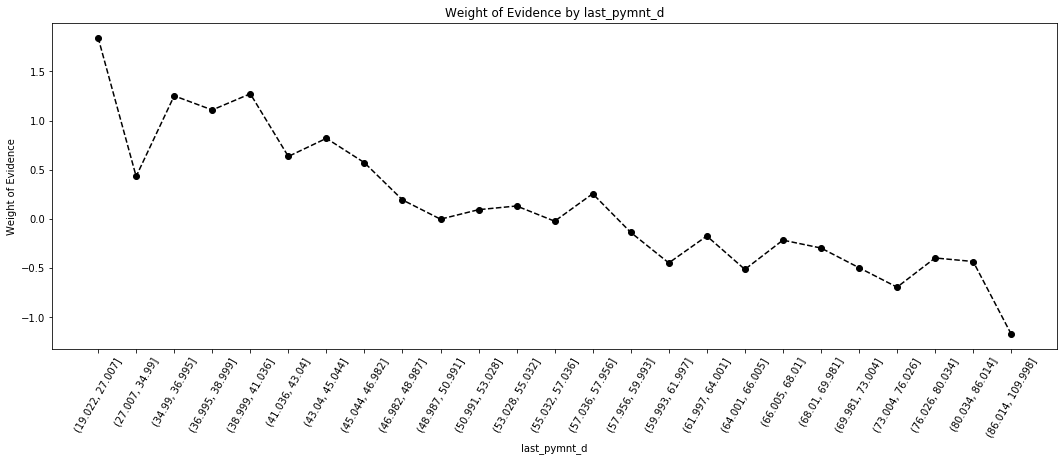

In [1477]:
plot_by_woe(df_lastpay_final)

#### Inference: As the number of days from last payment date increases, there is a strong trend that shows increased loan default rate

#### How 'funded-amnt' variable impacts loan default rates?

In [1478]:
loan_df1['funded_amnt'] = pd.qcut(loan_df1['funded_amnt'], 15)

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1479]:
df_funded = loan_df1[['funded_amnt', 'good_bad']]

In [1480]:
df_funded_final = woe_ordered_continuous(df_funded)
df_funded_final

,funded_amnt,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(699.999, 2500.0]",2178,0.858586,0.067984,1870.0,308.0,0.067264,0.072710,-0.077859,0.02327
1,"(2500.0, 4000.0]",3034,0.878708,0.094703,2666.0,368.0,0.095896,0.086874,0.098799,0.02327
2,"(4000.0, 5000.0]",2841,0.869060,0.088679,2469.0,372.0,0.088810,0.087819,0.011222,0.02327
3,"(5000.0, 5500.0]",519,0.876686,0.016200,455.0,64.0,0.016366,0.015109,0.079962,0.02327
4,"(5500.0, 6250.0]",2126,0.888993,0.066361,1890.0,236.0,0.067983,0.055713,0.199048,0.02327
5,"(6250.0, 7500.0]",2476,0.888126,0.077286,2199.0,277.0,0.079098,0.065392,0.190288,0.02327
6,"(7500.0, 8400.0]",1896,0.864979,0.059182,1640.0,256.0,0.058991,0.060434,-0.024178,0.02327
7,"(8400.0, 10000.0]",4124,0.876091,0.128726,3613.0,511.0,0.129959,0.120633,0.074472,0.02327
8,"(10000.0, 10150.0]",30,0.833333,0.000936,25.0,5.0,0.000899,0.001180,-0.272015,0.02327
9,"(10150.0, 12000.0]",3043,0.878409,0.094984,2673.0,370.0,0.096148,0.087347,0.096001,0.02327


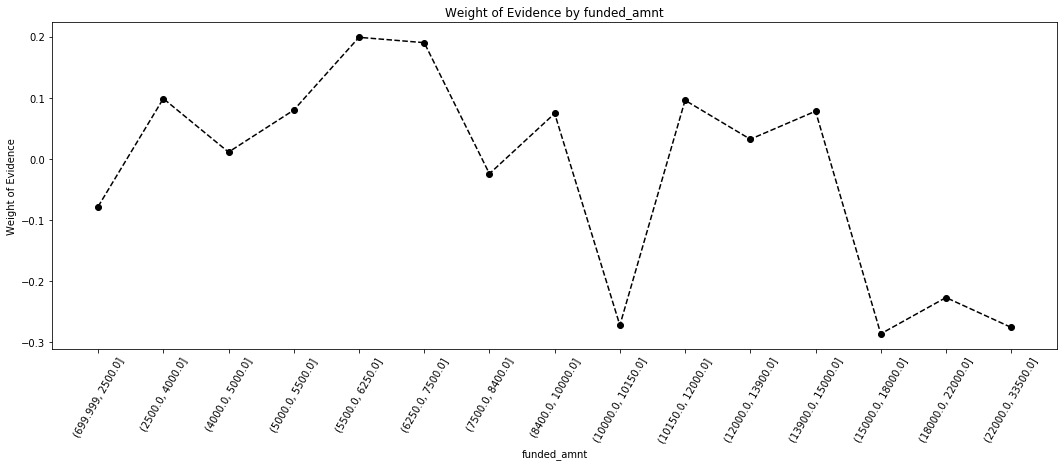

In [1481]:
plot_by_woe(df_funded_final)

#### Inference: There seems to be no discernable trend on loan default status when we plot WoE for funded amount across different values

#### How 'last_credit_pull_d' (counted by number of days) has an impact on loan default rate?

In [1482]:
loan_df1['last_credit_pull_d'] = pd.qcut(loan_df1['last_credit_pull_d'],8, duplicates='drop')

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1483]:
df_last_credit = loan_df1[['last_credit_pull_d', 'good_bad']] 

In [1484]:
df_last_credit_final = woe_ordered_continuous(df_last_credit)
df_last_credit_final

,last_credit_pull_d,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(19.022, 20.009]",9601,0.823143,0.299685,7903.0,1698.0,0.284270,0.400850,-0.343661,0.342686
1,"(20.009, 24.017]",2693,0.968808,0.084059,2609.0,84.0,0.093846,0.019830,1.554453,0.342686
2,"(24.017, 33.972]",3745,0.957810,0.116896,3587.0,158.0,0.129024,0.037299,1.241024,0.342686
3,"(33.972, 44.026]",4343,0.919871,0.135562,3995.0,348.0,0.143700,0.082153,0.559144,0.342686
4,"(44.026, 54.013]",3793,0.861060,0.118394,3266.0,527.0,0.117478,0.124410,-0.057332,0.342686
5,"(54.013, 66.005]",4079,0.813190,0.127322,3317.0,762.0,0.119312,0.179887,-0.410583,0.342686
6,"(66.005, 101.029]",3783,0.825800,0.118082,3124.0,659.0,0.112370,0.155571,-0.325307,0.342686


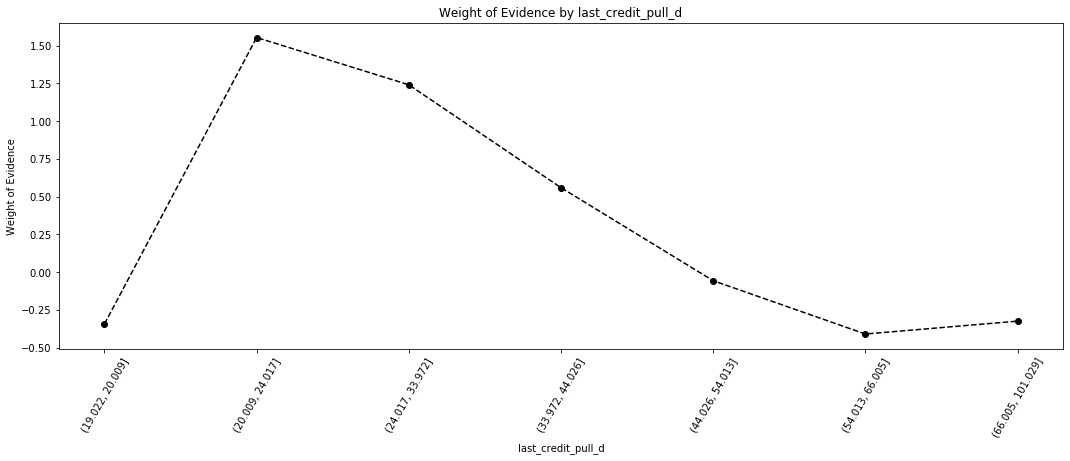

In [1485]:
plot_by_woe(df_last_credit_final)

#### Inference: There is low value fo Woe observed for very small bucket of credit pull date (19-20 days), post which there is a significant spike in WoE for the range of 20-24 days, and gradually declining trend post that

In [1486]:
IV_final =pd.DataFrame({'total_acc':[df_total_acc_final.iloc[-1,-1]],
              'last_credit_pull_d':[df_last_credit_final.iloc[-1,-1]],
              'last_payment_d':[df_lastpay_final.iloc[-1,-1]],
              'annual_inc':[df_annual_inc_final.iloc[-1,-1]],
              'revol_util':[df_revol_util_final.iloc[-1,-1]],
              'dti':[df_dti_final.iloc[-1,-1]],
              'int_rate':[df_int_rate_final.iloc[-1,-1]],
              'loan_term':[df_term_final.iloc[-1,-1]],
              'addr_state':[df_state_final.iloc[-1,-1]],
              'purpose':[df_purpose_final.iloc[-1,-1]],
              'loan_grade':[df_grade_final.iloc[-1,-1]],
              'loan_subgrade':[df_sub_grade_final.iloc[-1,-1]],
             })

In [1487]:
IV_final = IV_final.T

In [1488]:
IV_final.reset_index(inplace=True)
IV_final = IV_final.rename(columns={'index':'parameter',0:'IV value'})
IV_final = IV_final.sort_values(by='IV value', ascending=True)
IV_final

,parameter,IV value
0,total_acc,0.017913
5,dti,0.027059
8,addr_state,0.047914
9,purpose,0.062288
3,annual_inc,0.077006
4,revol_util,0.105290
7,loan_term,0.224548
10,loan_grade,0.316944
1,last_credit_pull_d,0.342686
11,loan_subgrade,0.355946


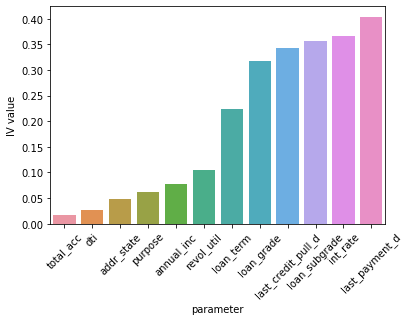

In [1489]:
sns.barplot(x='parameter', y='IV value', data=IV_final)
plt.xticks(rotation = 45)
plt.show()